In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("enso_index.csv")
df

,year,january,february,march,april,may,june,july,august,september,october,november,december,avg
0,1958,1.54,1.40,0.99,0.31,0.32,0.30,0.04,0.24,-0.31,-0.03,0.05,0.30,0.0675
1,1959,0.43,0.50,0.26,0.27,-0.01,-0.33,-0.28,-0.41,-0.53,0.11,-0.17,-0.05,-0.3875
2,1960,0.02,-0.24,-0.08,0.01,0.05,-0.20,-0.25,0.00,0.03,-0.07,-0.38,0.02,-0.1050
3,1961,-0.15,0.04,-0.10,0.13,-0.01,0.10,-0.32,-0.25,-0.52,-0.71,-0.19,-0.29,-0.2475
4,1962,-0.25,-0.16,-0.41,-0.32,-0.42,-0.22,-0.30,-0.13,-0.56,-0.33,-0.43,-0.49,-0.3025
5,1963,-0.32,-0.26,-0.06,-0.06,0.00,0.12,0.72,0.90,0.65,0.84,0.75,1.05,0.5975
6,1964,0.76,0.55,-0.16,-0.53,-0.74,-0.88,-0.65,-0.76,-0.93,-1.00,-1.10,-1.07,-0.8050
7,1965,-0.57,-0.36,-0.34,-0.09,0.19,0.45,0.81,1.25,1.26,1.61,1.54,1.45,0.9425
8,1966,1.13,0.83,0.83,0.54,-0.06,0.14,0.23,-0.10,-0.05,-0.05,-0.37,-0.26,0.0550
9,1967,-0.55,-0.56,-0.47,-0.53,-0.24,-0.12,-0.10,-0.31,-0.59,-0.38,-0.34,-0.35,-0.2800


In [3]:
df_month = pd.read_csv("pearson_corr.csv")
df_month

,November_5,August_4,July,November,April,September_2,May_9,April_3,November_4,July_2,...,April_7,February_2,February_3,November_6,December_3,March,February,April_4,December_2,September_3
0,-0.136173,-0.184693,-0.164218,-1.214892,-0.033340,0.851391,-0.567464,0.201070,-0.996229,0.101431,...,0.550376,-0.080097,0.255359,-0.723890,-0.274456,-0.360929,0.591453,-0.272870,0.257539,0.979921
1,-0.136173,-0.184693,-0.164218,-1.214892,-0.128477,0.851391,-0.663306,0.242290,-0.996229,0.101431,...,-0.109489,-0.540310,0.652968,-0.723890,-0.274456,-0.587768,0.228647,-0.168902,0.257539,0.979921
2,0.108331,-0.868623,0.080121,-1.081003,-0.367615,0.606066,-0.431109,0.272310,-0.395123,-0.266198,...,0.434874,-0.234397,0.277680,-0.141262,-0.082105,-0.173443,0.245274,-0.245395,0.037468,0.494845
3,-0.122380,-0.638803,-0.309253,-0.635890,0.070520,1.034079,-0.627715,0.335088,-0.665580,-0.033436,...,0.153489,0.017694,0.115199,-0.482325,-0.282303,-0.135768,0.624404,0.268900,0.365493,0.049789
4,-0.611427,-0.607522,-0.069573,-1.005138,-0.152520,0.426557,-0.906395,0.325991,-0.668826,-0.315665,...,-0.098966,-0.128956,0.283701,-0.738998,-0.073485,-0.160619,0.491404,-0.420117,-0.172674,0.042100
5,-0.277523,-0.054206,-0.158134,-1.068305,-0.013483,0.617339,-0.383592,0.382388,-0.466628,0.692697,...,0.479633,0.076678,0.054503,-0.026387,0.325798,-0.547673,0.227422,-0.101464,-0.053067,0.261398
6,-0.628275,-0.508316,0.113819,-0.731337,0.308467,0.856599,-0.663260,-0.120850,-0.800946,0.285015,...,0.130356,-0.043622,0.392788,-0.690534,-0.151334,-0.438335,0.315836,-0.308153,0.245965,0.055255
7,-0.114973,-0.210749,-0.410808,-1.387361,-0.353708,0.607791,-0.324771,0.236854,-0.025484,0.880991,...,0.057736,-0.267839,0.006376,-0.162354,0.232873,-0.400128,0.007845,-0.149249,0.032651,0.049900
8,0.293501,-0.143427,-0.247025,-0.726642,-0.129378,0.392296,-0.611774,0.397929,-0.497994,-0.175528,...,0.552845,-0.074992,-0.148614,-0.515591,0.184289,-0.485542,0.091599,-0.289241,0.124793,-0.111961
9,-0.018843,-0.238002,-0.025460,-1.174447,0.011126,1.005638,-0.329415,0.045043,-0.192766,-0.045503,...,0.418184,-0.144407,0.486554,-0.451123,-0.207832,-0.208416,0.197550,-0.220995,0.106672,0.122974


In [4]:
scaler = StandardScaler()

In [5]:
x_train = df_month.iloc[:42, :15]
x_train = scaler.fit_transform(x_train)
x_train

array([[-2.52953697e-01,  5.79310974e-01, -5.33834429e-01,
        -6.54357520e-01, -2.10320534e-01,  7.80404397e-01,
        -4.75783785e-01,  1.97962870e-01, -7.74304282e-01,
        -1.72027773e-01,  7.40220161e-01, -5.00266394e-02,
        -7.01621778e-01,  1.12430791e-01,  7.60221249e-01],
       [-2.52953697e-01,  5.79310974e-01, -5.33834429e-01,
        -6.54357520e-01, -5.54323939e-01,  7.80404397e-01,
        -9.26803193e-01,  4.06636568e-01, -7.74304282e-01,
        -1.72027773e-01,  6.43934584e-01, -1.15603202e+00,
        -1.41275221e+00,  1.12430791e-01,  6.67949048e-02],
       [ 7.12564552e-01, -2.03462810e+00,  6.49466381e-01,
        -2.84561132e-01, -1.41901195e+00, -9.14241718e-02,
         1.65882903e-01,  5.58604861e-01,  7.57689617e-01,
        -1.04070465e+00,  1.13484488e+00, -8.46224819e-01,
         8.19787578e-01, -7.90898406e-01,  4.53162235e-01],
       [-1.98485327e-01, -1.15626984e+00, -1.23621922e+00,
         9.44823179e-01,  1.65223373e-01,  1.42963196

In [6]:
y_train = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_tr= df.iloc[:42][i]
    y_train.append(y_tr)
    

In [7]:
y_train

[0     0.0675
 1    -0.3875
 2    -0.1050
 3    -0.2475
 4    -0.3025
 5     0.5975
 6    -0.8050
 7     0.9425
 8     0.0550
 9    -0.2800
 10    0.2200
 11    0.3375
 12   -0.7525
 13   -0.7050
 14    0.9950
 15   -1.1525
 16   -0.5050
 17   -1.2725
 18    0.2575
 19    0.3750
 20   -0.5375
 21    0.1325
 22    0.0100
 23   -0.2075
 24    0.9700
 25   -0.0300
 26   -0.5125
 27   -0.6075
 28    0.2275
 29    1.3975
 30   -1.4425
 31   -0.5175
 32    0.1100
 33    0.4800
 34    0.1275
 35    0.3475
 36    0.3375
 37   -0.2100
 38   -0.2250
 39    1.6975
 40   -0.6925
 41   -0.9025
 Name: avg, dtype: float64,
 0     0.30
 1    -0.33
 2    -0.20
 3     0.10
 4    -0.22
 5     0.12
 6    -0.88
 7     0.45
 8     0.14
 9    -0.12
 10    0.19
 11    0.26
 12   -0.30
 13   -0.78
 14    0.66
 15   -0.86
 16   -0.70
 17   -1.25
 18    0.00
 19    0.36
 20   -0.45
 21    0.04
 22    0.37
 23   -0.15
 24    0.92
 25    0.62
 26   -0.90
 27   -0.76
 28   -0.08
 29    1.24
 30   -1.46
 31   -0.64


In [8]:
x_test = df_month.iloc[43:, :15]
x_test = scaler.fit_transform(x_test)
x_test

array([[-0.05137416, -0.00716389,  0.52997156, -0.62856208,  0.11232531,
        -0.88786178, -0.98080653, -0.25118282, -0.56018101,  1.32628916,
         0.46019097, -0.35872165,  0.83173404,  1.12712091,  0.15906404],
       [-0.10836174,  1.24392774, -1.17971553, -0.00910632, -1.90162317,
         0.4152754 ,  2.05553679,  1.16395294,  1.11510233, -0.51238219,
        -0.69406097, -1.52878697,  1.1862444 ,  2.49673637, -0.10691586],
       [ 0.20446034,  0.91924568, -0.28710028,  1.0028332 ,  0.59723492,
        -0.28185145, -1.16931356, -0.04277086, -0.92982322,  0.30128101,
         0.97284989, -0.84127249, -0.21829721,  0.02951532, -0.63227221],
       [ 1.90198944,  0.20158772, -0.77919693,  0.42689332, -0.29437194,
        -0.23330008, -1.68942575, -0.99074387,  0.47362672,  0.84320629,
        -0.53742645, -1.30649702, -1.34015715, -1.05227592, -1.9835189 ],
       [ 0.19381147,  1.46876177, -1.21874913, -0.24311118,  0.27749453,
        -0.45164858,  1.57759253,  0.93365998, 

In [9]:
y_test = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_ts= df.iloc[43:][i] 
    y_test.append(y_ts)

In [10]:
y_test

[43   -0.1125
 44    0.6925
 45    0.0375
 46    0.4700
 47    0.0225
 48    0.2800
 49   -0.5350
 50   -0.2000
 51    0.6200
 52   -1.1000
 53   -0.4750
 54    0.4200
 55   -0.2475
 56    0.2800
 57    1.6800
 58   -0.2825
 Name: avg, dtype: float64,
 43   -0.11
 44    0.68
 45   -0.19
 46    0.14
 47    0.22
 48    0.09
 49   -0.16
 50   -0.44
 51    0.49
 52   -0.62
 53   -0.25
 54    0.14
 55   -0.33
 56    0.48
 57    1.28
 58    0.06
 Name: june, dtype: float64,
 43    0.01
 44    0.57
 45    0.14
 46    0.41
 47   -0.01
 48    0.03
 49   -0.37
 50   -0.04
 51    0.69
 52   -0.89
 53   -0.23
 54    0.44
 55   -0.28
 56    0.13
 57    1.56
 58   -0.25
 Name: july, dtype: float64,
 43   -0.07
 44    0.70
 45    0.05
 46    0.66
 47   -0.04
 48    0.37
 49   -0.57
 50   -0.04
 51    0.62
 52   -1.33
 53   -0.66
 54    0.66
 55   -0.29
 56    0.14
 57    1.87
 58   -0.48
 Name: august, dtype: float64,
 43   -0.28
 44    0.82
 45    0.15
 46    0.67
 47   -0.08
 48    0.63
 49   -1.04

# Bagging Regressor:

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

def perform_grid_search(x_train, y_train, x_test):
    param_grid = {
        'base_estimator__max_depth': range(1, 5),
        'n_estimators': range(1, 51)
    }

    # Create the BaggingRegressor with DecisionTreeRegressor as the base estimator
    bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), oob_score=True, random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(bagging_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_max_depth = best_params['base_estimator__max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")

    # Use the best parameters to train a BaggingRegressor and make predictions
    regressor = BaggingRegressor(
        base_estimator=DecisionTreeRegressor(max_depth=best_max_depth),
        n_estimators=best_n_estimators,
        oob_score=True,
        random_state=0)
    
    regressor.fit(x_train, y_train)
    score = regressor.score(x_train, y_train)
    y_pred = regressor.predict(x_test)

    return best_params, best_score, score, y_pred


In [12]:

y_pred_list = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list.append(y_pred)



Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 4}
Best Score: 0.3702210706960835
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 32}
Best Score: 0.27412483860453507
Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 7}
Best Score: 0.41557549112841735
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 32}
Best Score: 0.444672231456703
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 34}
Best Score: 0.3788414532292475


In [13]:
y_pred_list

[array([-0.40451732,  0.69601974,  0.17076974,  0.46794362,  0.29818451,
        -0.40451732, -0.6239816 , -0.75139638,  0.00842358, -0.05329626,
        -0.05329626, -0.40451732, -0.13940013, -0.05329626,  0.63028977,
        -0.6239816 ]),
 array([-0.37492214,  0.37514163,  0.16134182, -0.01750286,  0.24914859,
        -0.11756104, -0.4252504 , -0.61998329,  0.01497247,  0.02195628,
         0.00304499, -0.12642914,  0.15370448, -0.06986714,  0.40497132,
        -0.47706495]),
 array([-0.18850413,  0.58458059,  0.17291726,  0.08229862,  0.29983455,
        -0.0721107 , -0.37354003, -0.6028704 ,  0.13608099, -0.2195664 ,
        -0.19338462, -0.0721107 , -0.17461265, -0.180249  ,  0.41809186,
        -0.52812739]),
 array([ 0.45619935,  0.55133212, -0.07690769,  0.1126874 ,  0.18226155,
        -0.17649916, -0.0365413 , -0.80269663,  0.01730089, -0.00602882,
         0.1755973 , -0.10177934,  0.20401214,  0.08752201,  0.36212305,
        -0.62018784]),
 array([ 0.02367127,  0.76676466

In [14]:
correlation_list = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list.append(corr_bag_reg_mean[0][1])

In [15]:
correlation_list

[0.5727975064310787,
 0.5218179524547517,
 0.6591746394661855,
 0.2942576906926399,
 0.4483171338913823]

In [16]:
months = ['jjas-mean','june','july','august','september']

In [17]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/hgt+vwind/15 predictors/pearson/coorelation_plots/bagging_regressor'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'hgt+vwind (2001-2016) 15p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'15p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)


Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/hgt+vwind/15 predictors/pearson/coorelation_plots/bagging_regressor


In [18]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/hgt+vwind/15 predictors/pearson/comparison plots/bagging_regressor'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'hgt+vwind Predicted vs Actual 15p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'15p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/hgt+vwind/15 predictors/pearson/comparison plots/bagging_regressor


# Random Forest

In [19]:


def perform_random_forest_grid_search(x_train, y_train, x_test):
    # Define the parameter grid
    param_grid = {
        'n_estimators': range(1, 51),
        'max_depth': range(1, 5),
    }

    # Create the RandomForestRegressor
    random_forest_reg = RandomForestRegressor(random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(random_forest_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Save the best values into separate variables
    best_max_depth = best_params['max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")
    print(f"Best max_depth: {best_max_depth}")
    print(f"Best n_estimators: {best_n_estimators}")

    # Use the best parameters to train a RandomForestRegressor and make predictions
    RF = RandomForestRegressor(
        n_estimators=best_n_estimators,
        max_depth=best_max_depth,
        random_state=0)

    RF.fit(x_train, y_train)
    score = RF.score(x_train, y_train)
    y_pred_rf = RF.predict(x_test)

    return best_params, best_score, score, y_pred_rf


In [20]:

y_pred_list_rf = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list_rf.append(y_pred)


Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 4}
Best Score: 0.3702210706960835
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 32}
Best Score: 0.27412483860453507
Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 7}
Best Score: 0.41557549112841735
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 32}
Best Score: 0.444672231456703
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 34}
Best Score: 0.3788414532292475


In [21]:
y_pred_list_rf

[array([-0.40451732,  0.69601974,  0.17076974,  0.46794362,  0.29818451,
        -0.40451732, -0.6239816 , -0.75139638,  0.00842358, -0.05329626,
        -0.05329626, -0.40451732, -0.13940013, -0.05329626,  0.63028977,
        -0.6239816 ]),
 array([-0.37492214,  0.37514163,  0.16134182, -0.01750286,  0.24914859,
        -0.11756104, -0.4252504 , -0.61998329,  0.01497247,  0.02195628,
         0.00304499, -0.12642914,  0.15370448, -0.06986714,  0.40497132,
        -0.47706495]),
 array([-0.18850413,  0.58458059,  0.17291726,  0.08229862,  0.29983455,
        -0.0721107 , -0.37354003, -0.6028704 ,  0.13608099, -0.2195664 ,
        -0.19338462, -0.0721107 , -0.17461265, -0.180249  ,  0.41809186,
        -0.52812739]),
 array([ 0.45619935,  0.55133212, -0.07690769,  0.1126874 ,  0.18226155,
        -0.17649916, -0.0365413 , -0.80269663,  0.01730089, -0.00602882,
         0.1755973 , -0.10177934,  0.20401214,  0.08752201,  0.36212305,
        -0.62018784]),
 array([ 0.02367127,  0.76676466

In [22]:
correlation_list_rf = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list_rf.append(corr_bag_reg_mean[0][1])

In [23]:
correlation_list_rf

[0.5727975064310787,
 0.5218179524547517,
 0.6591746394661855,
 0.2942576906926399,
 0.4483171338913823]

In [24]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/hgt+vwind/15 predictors/pearson/coorelation_plots/randomforest'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'hgt+vwind (2001-2016) 15p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'15_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)

Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/hgt+vwind/15 predictors/pearson/coorelation_plots/randomforest


In [25]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/hgt+vwind/15 predictors/pearson/comparison plots/randomforest'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list_rf[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'hgt+vwind Predicted vs Actual 15p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'15p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/hgt+vwind/15 predictors/pearson/comparison plots/randomforest


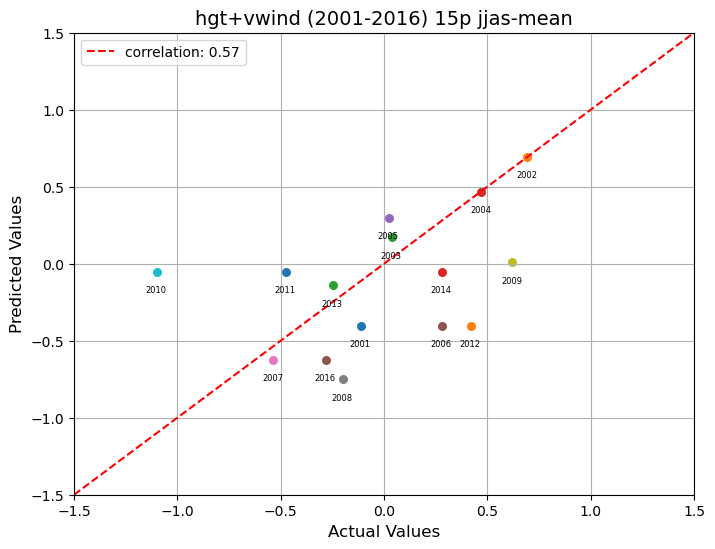

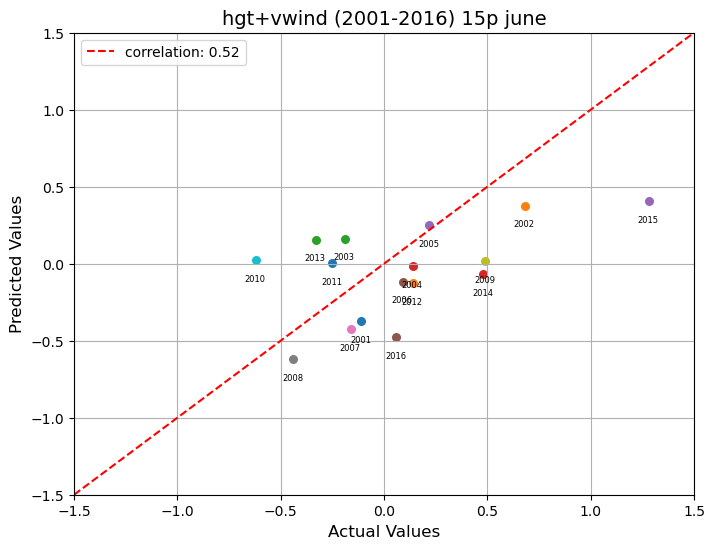

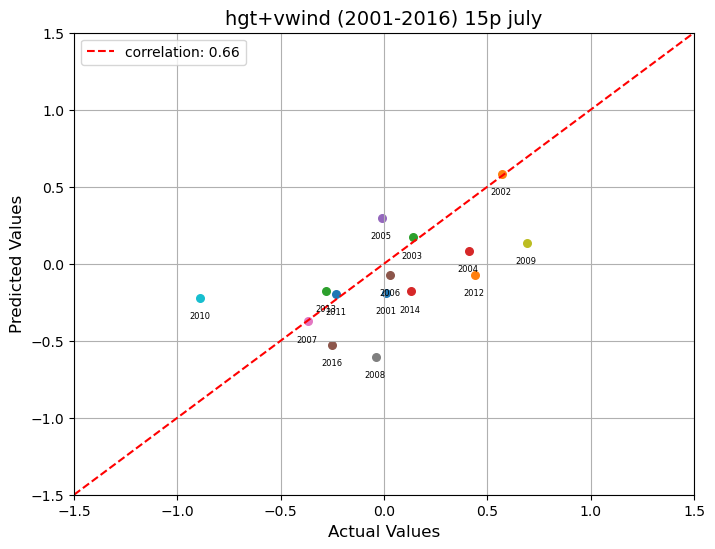

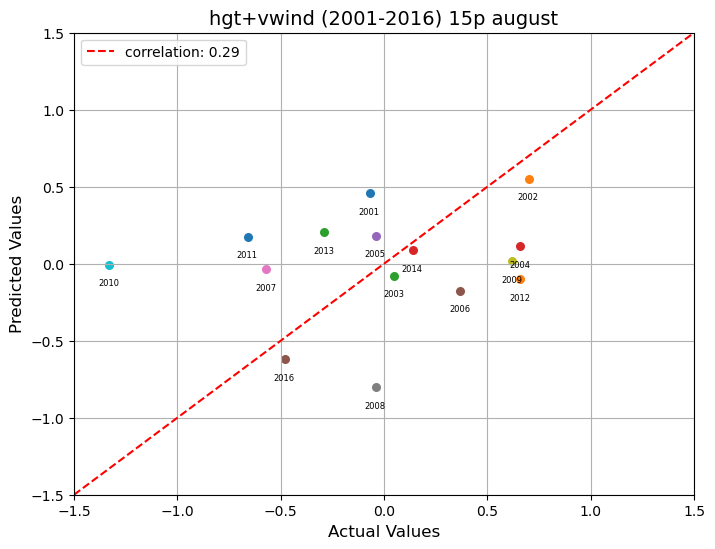

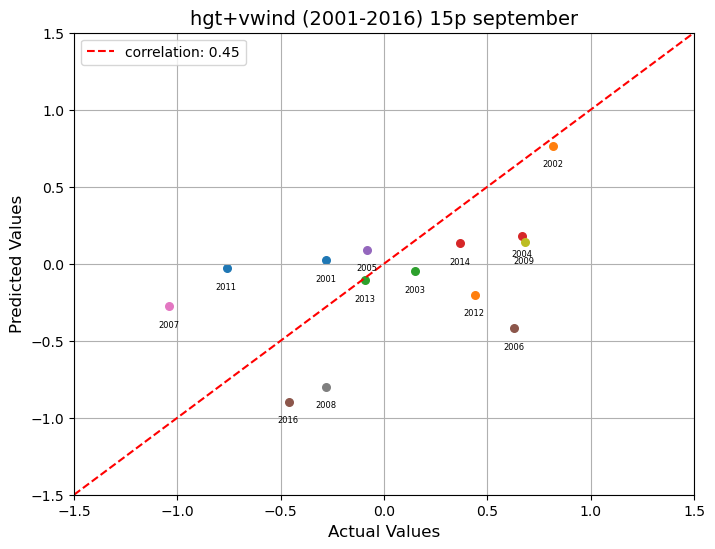

In [26]:
for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=30)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=6)

    # Add diagonal line and plot elements
    plt.plot([-1.5, 1.5], [-1.5, 1.5], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'hgt+vwind (2001-2016) 15p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-1.5, 1.5)  # Set limits from -2 to 2
    plt.ylim(-1.5, 1.5)
    plt.grid(True)
    plt.legend()
    plt.show

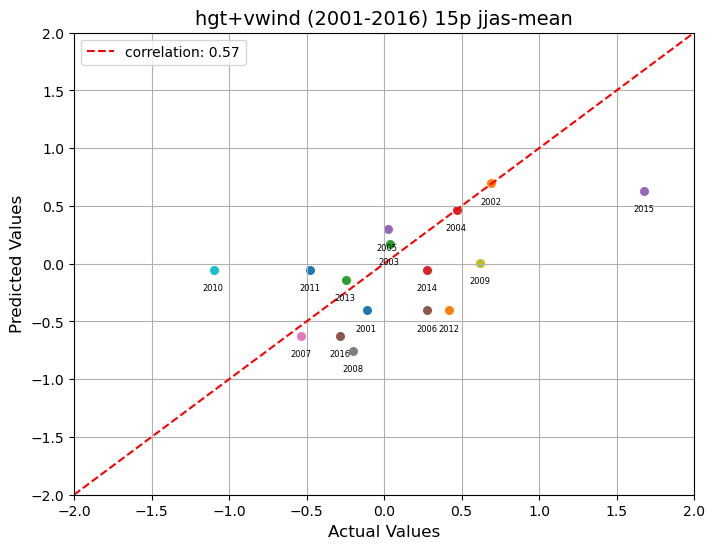

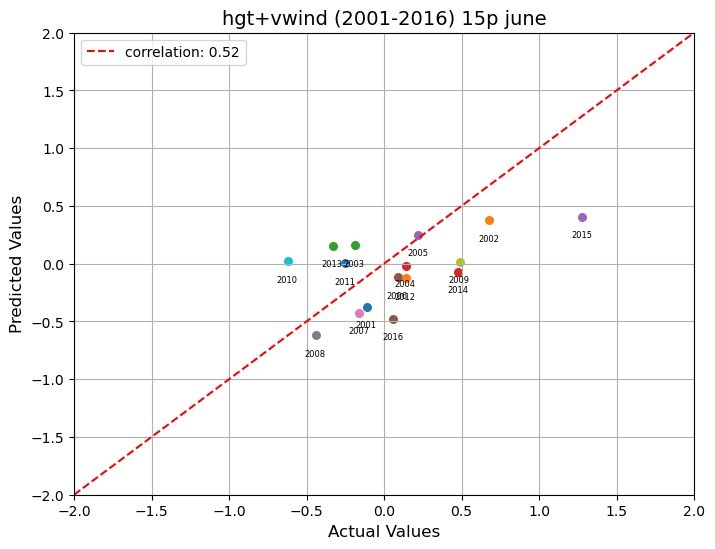

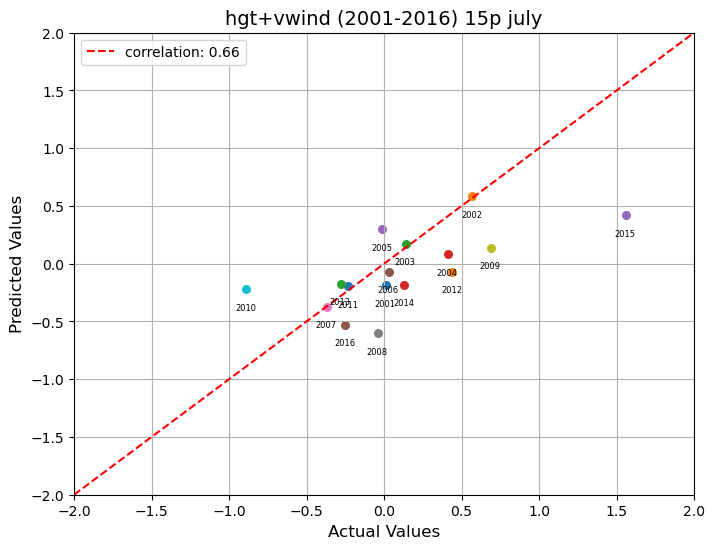

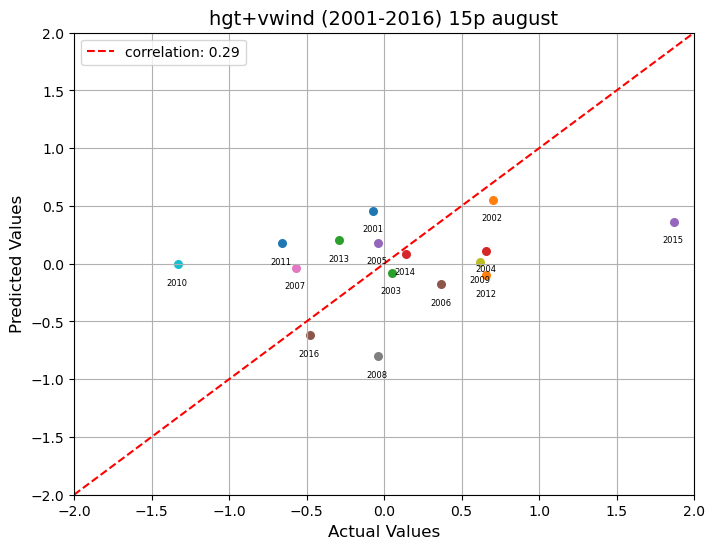

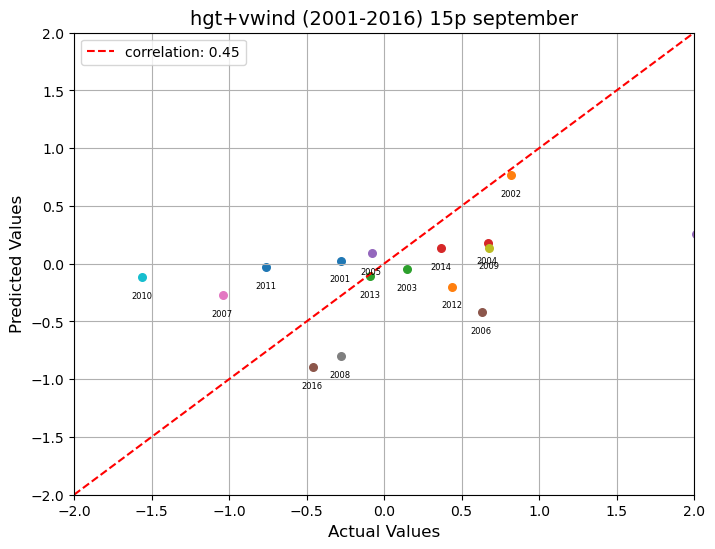

In [27]:
for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=30)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=6)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'hgt+vwind (2001-2016) 15p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()
    plt.show